# Account Prediction

## Loading In Data

In [69]:
import pandas as pd

df =  pd.read_csv('accounts.csv')

df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [70]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


## Data Analysis

### Initial Data Exploration

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [72]:
#Check for uniqueness in columns
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [73]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [74]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

### Data Visualization

In [75]:
from matplotlib import pyplot as plt
import seaborn as sns

Comparing each Account Type's Amount

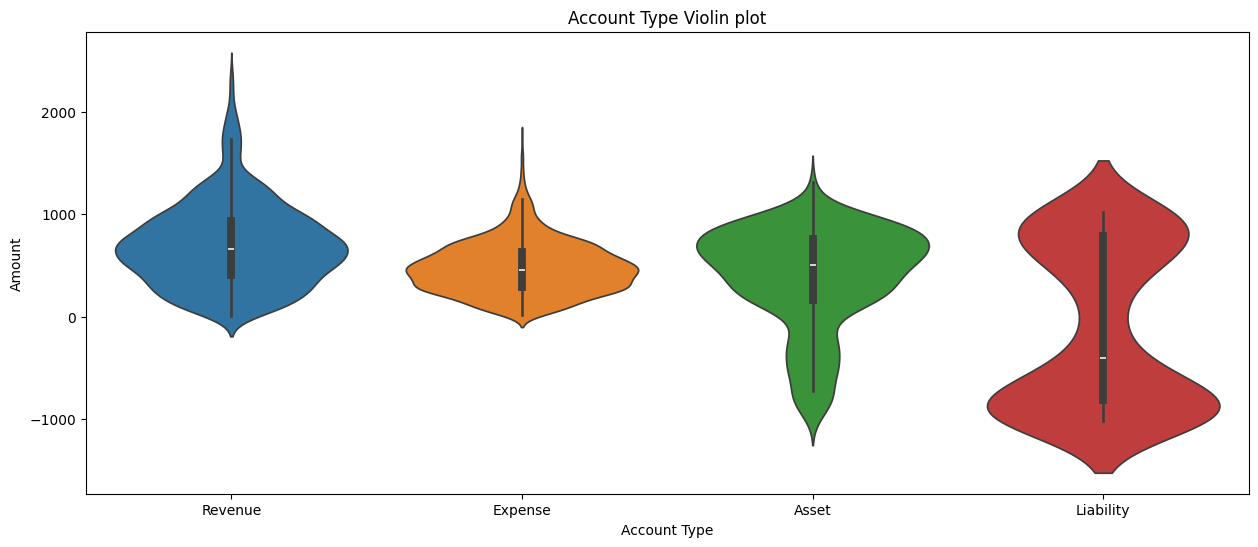

In [76]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Account Type', y='Amount', data=df, hue='Account Type').set_title('Account Type Violin plot')
plt.show()

Liability Account seems like it is the furthest from a normal distribution

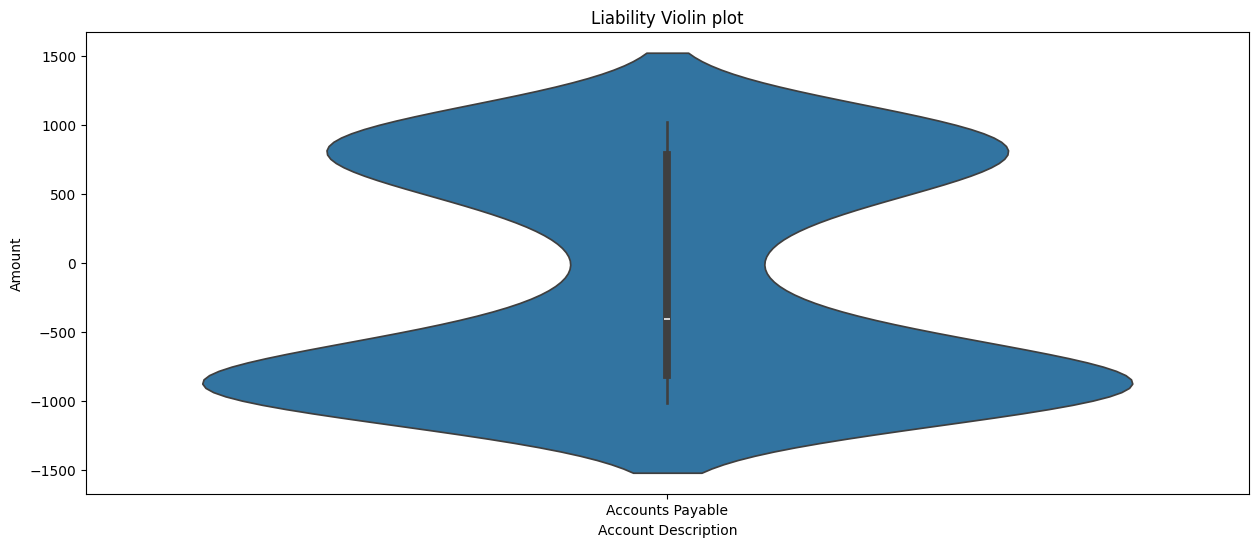

In [77]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability Violin plot')
plt.show()

One Account in Liability

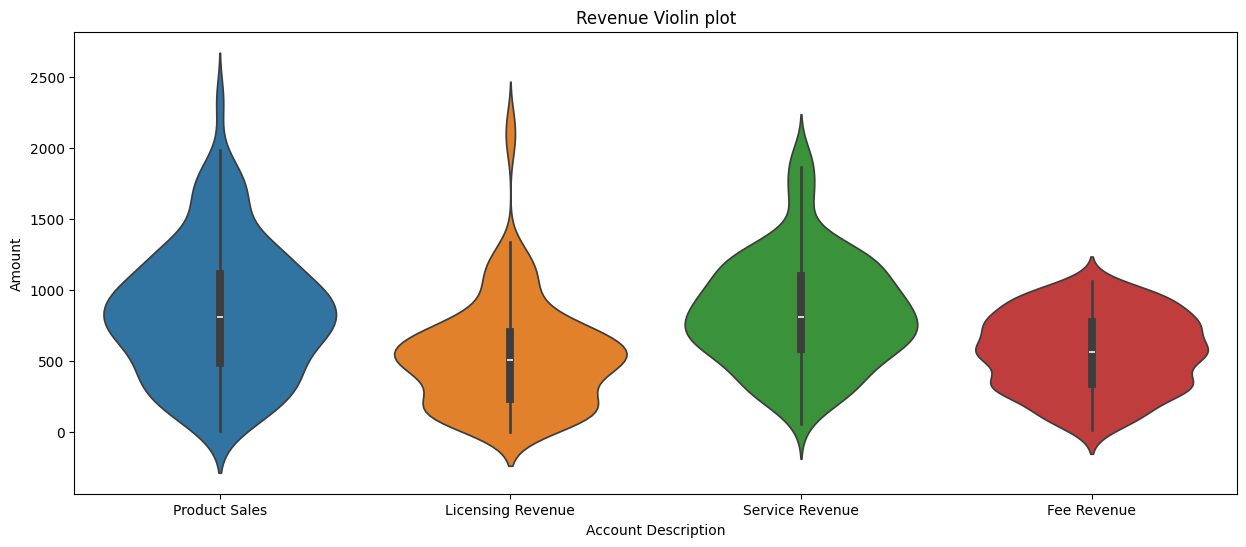

In [78]:
#Violin Plot for Revenue Accounts
plt.figure(figsize=(15,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue'], hue='Account Description').set_title('Revenue Violin plot')
plt.show()

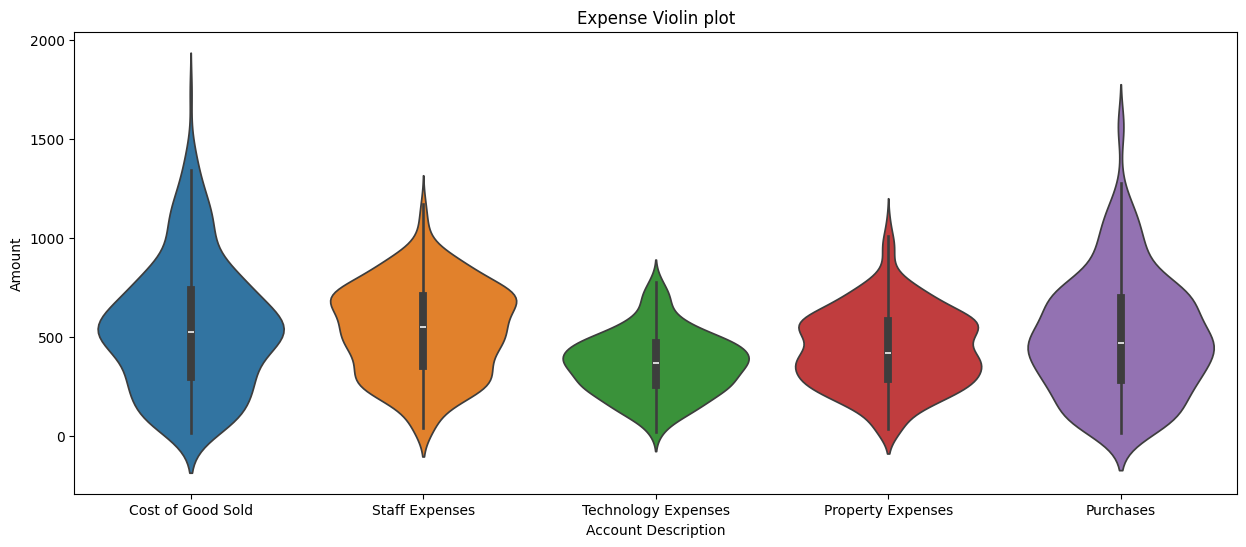

In [79]:
#Violin Plot for Expense Accounts
plt.figure(figsize=(15,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Expense'], hue='Account Description').set_title('Expense Violin plot')
plt.show()

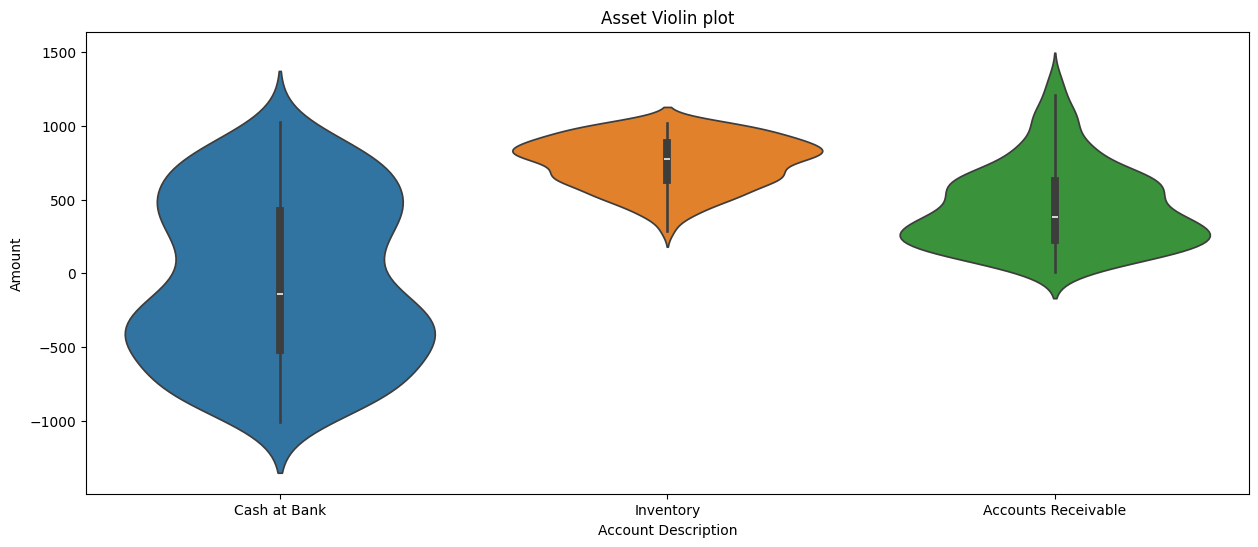

In [80]:
#Violin Plot for Asset Accounts
plt.figure(figsize=(15,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Asset'], hue='Account Description').set_title('Asset Violin plot')
plt.show()

Cash at Bank is the furthest from a normal distribution

#### Reviewing Trends

Creating a Date Column by converting Year and Month into a date string

In [81]:
#Month Map
monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

In [82]:
monthmap['Jan']

1

In [83]:
#Applying monthmap transformation by creating Period column 
df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [84]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1


In [85]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121,12
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056,12
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478,12
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680,12
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000,12


In [86]:
df['Day'] = 1

df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1


In [87]:
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)

df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-1-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-1-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-1-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-1-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-1-1


In [88]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
Period                   int64
Day                      int64
Date                    object
dtype: object

In [89]:
#Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

Identiying trend in data using Revenue Accounts

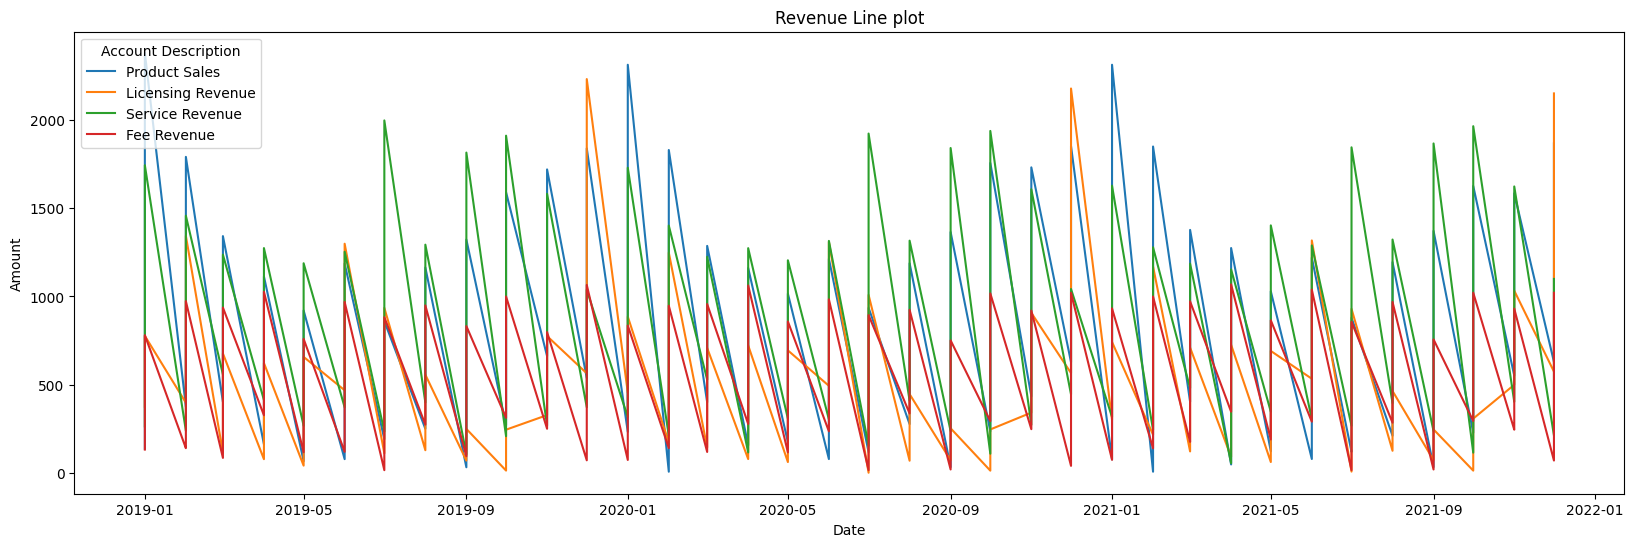

In [90]:
#Line Plot for Revenue Accounts
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', estimator=None, data=df[df['Account Type']=='Revenue'], hue='Account Description').set_title('Revenue Line plot')
plt.show()

Appears to have some seasonality, maybe isolating a few Account Descriptions will help this to be more clearer

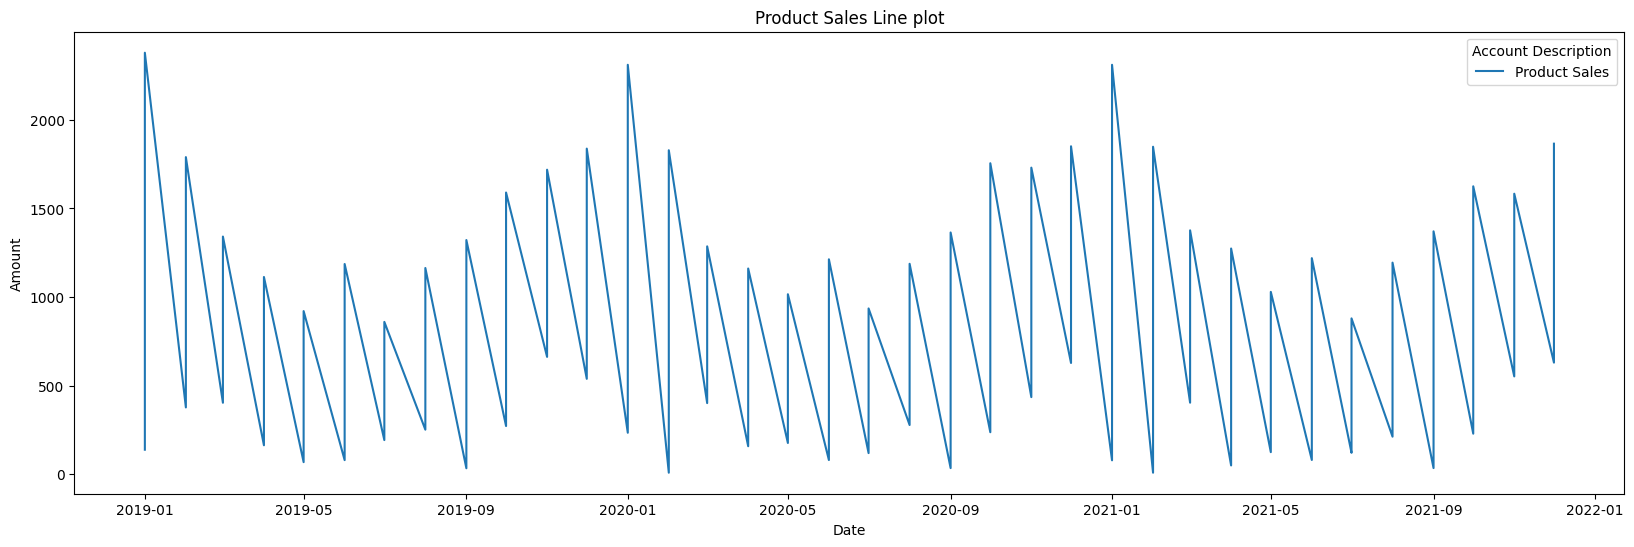

In [91]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', estimator=None, data=df[df['Account Description']=='Product Sales'], hue='Account Description').set_title('Product Sales Line plot')
plt.show()

Definitely some seasonality for Product Sales

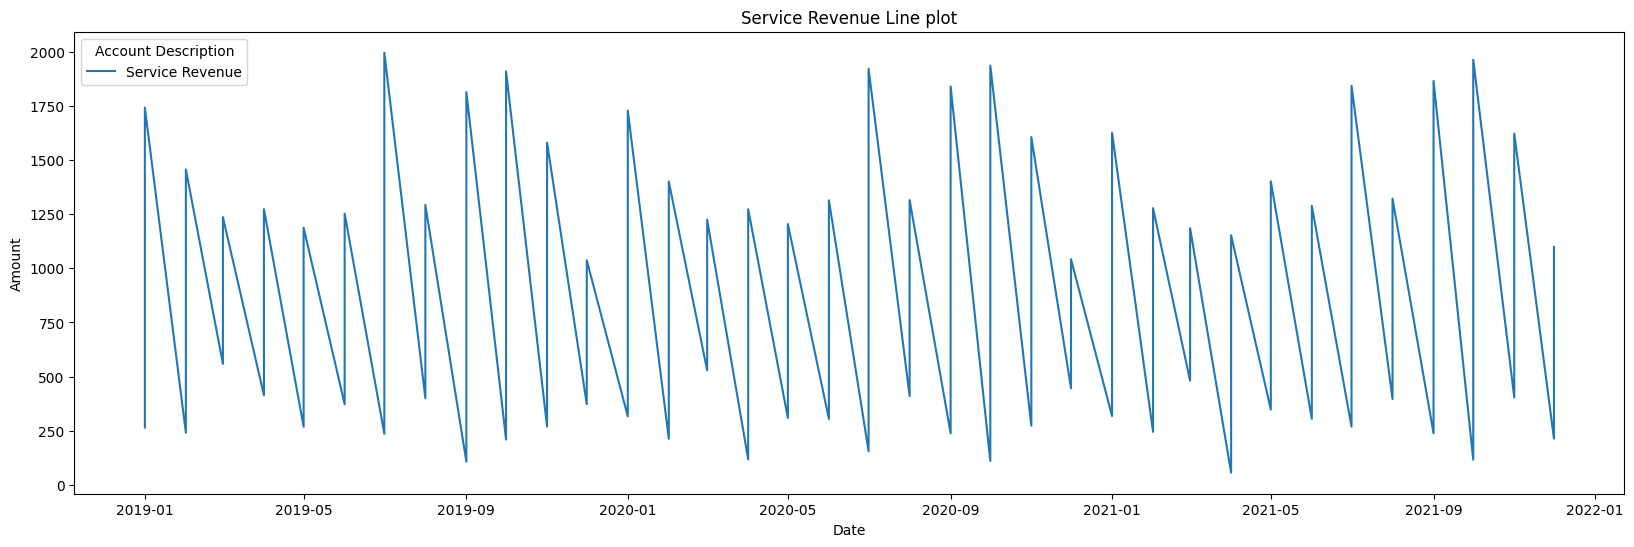

In [92]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', estimator=None, data=df[df['Account Description']=='Service Revenue'], hue='Account Description').set_title('Service Revenue Line plot')
plt.show()

Definetly a lot less seasonal than Product Sales

#### Correlation

In [93]:
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

Reshaping dataframe so that we can view relationships between accounts

In [94]:
#One-hot encoding on Account column
pd.get_dummies(df['Account'], dtype=int)

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [95]:
#Creating a sepearate dataframe to view correlation using a dictionary
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [96]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0) 

In [97]:
corrdf

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,698.121,0.000,0.000,0.00,0.0
4208,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,-282.056,0.000,0.00,0.0
4209,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,537.478,0.00,0.0
4210,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,1152.68,0.0


Seaborn heatmap to view correlation

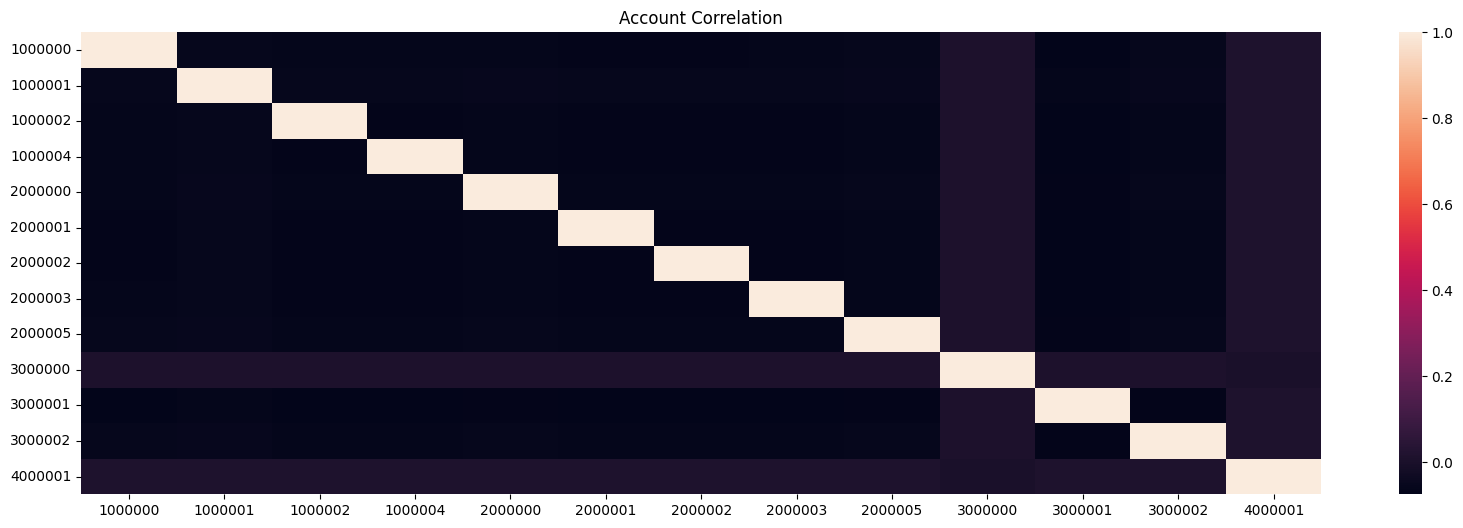

In [98]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr()).set_title('Account Correlation')
plt.show()

Accounts 3000000 and 4000001 seem to have a slight correlation with the other accounts

In [99]:
df[df['Account']==3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


In [100]:
df[df['Account']==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
12,2019,Jan,CC100,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
25,2019,Jan,CC101,4000001,Accounts Payable,Liability,200.0,1,1,2019-01-01
38,2019,Jan,CC102,4000001,Accounts Payable,Liability,-980.0,1,1,2019-01-01
51,2019,Jan,CC200,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
64,2019,Jan,CC201,4000001,Accounts Payable,Liability,784.0,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4159,2021,Dec,CC201,4000001,Accounts Payable,Liability,804.0,12,1,2021-12-01
4172,2021,Dec,CC202,4000001,Accounts Payable,Liability,-1018.0,12,1,2021-12-01
4185,2021,Dec,CC300,4000001,Accounts Payable,Liability,-1020.0,12,1,2021-12-01
4198,2021,Dec,CC301,4000001,Accounts Payable,Liability,-612.0,12,1,2021-12-01


## Data Preperation

In [101]:
import numpy as np

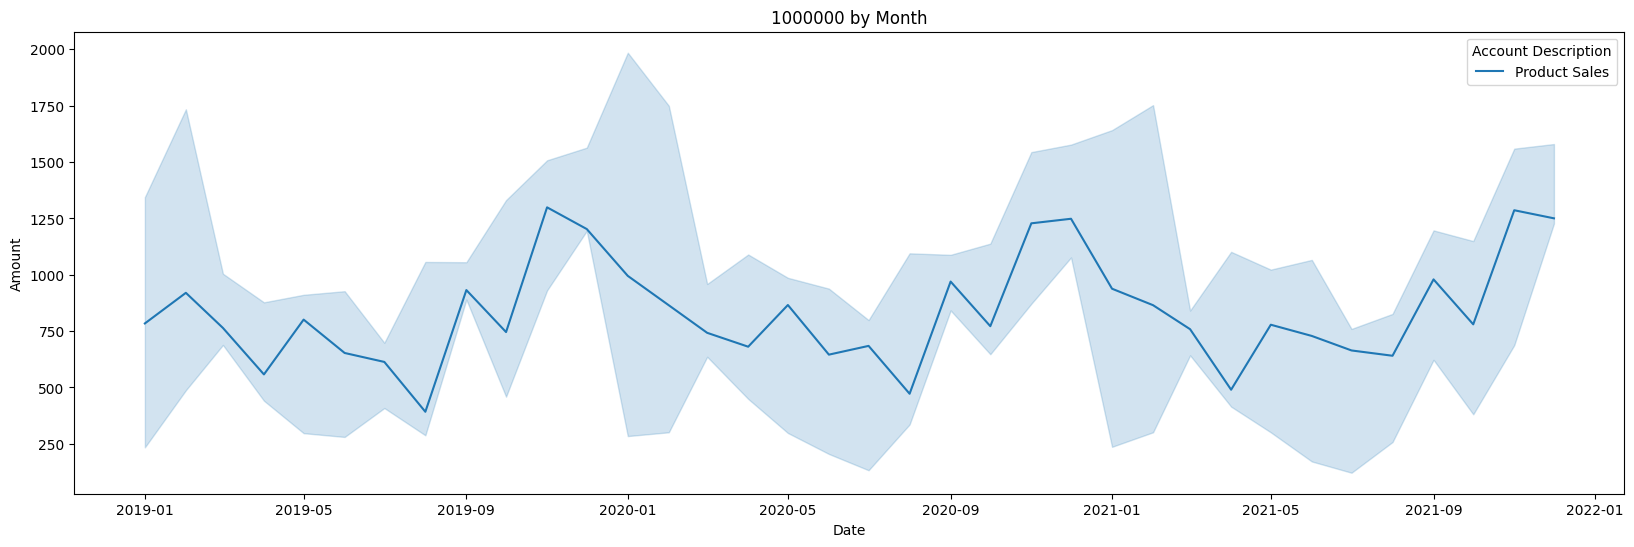

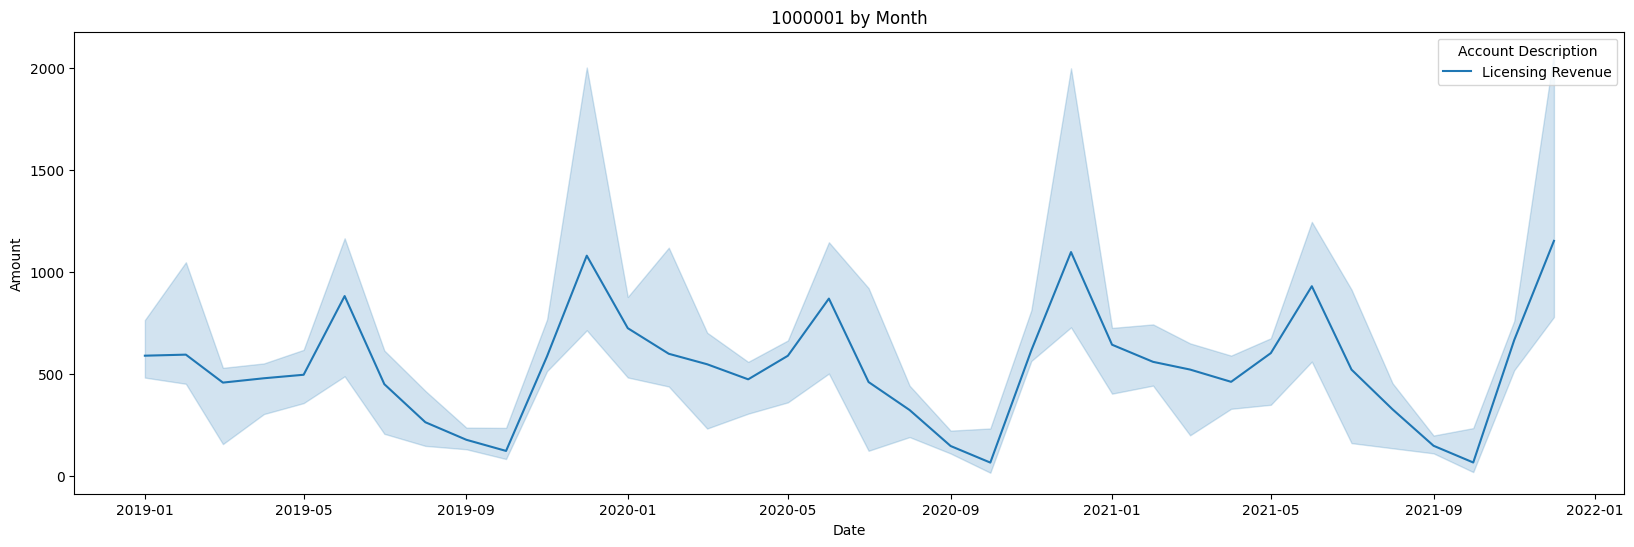

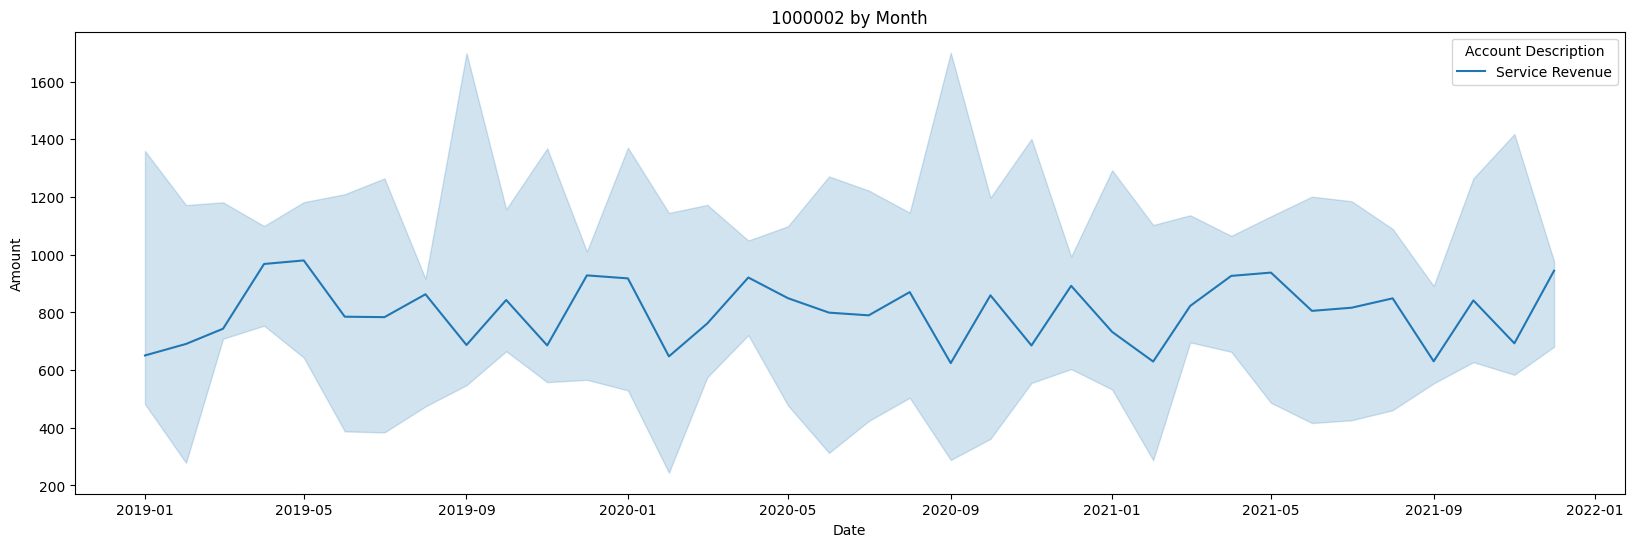

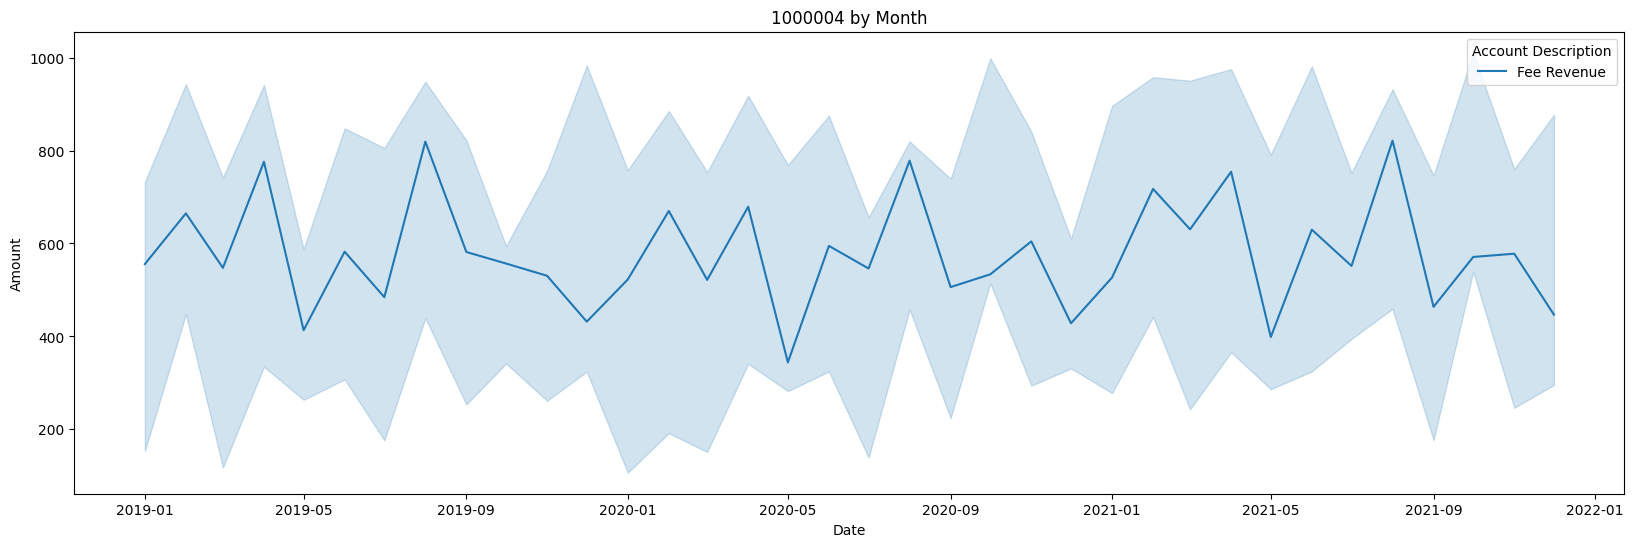

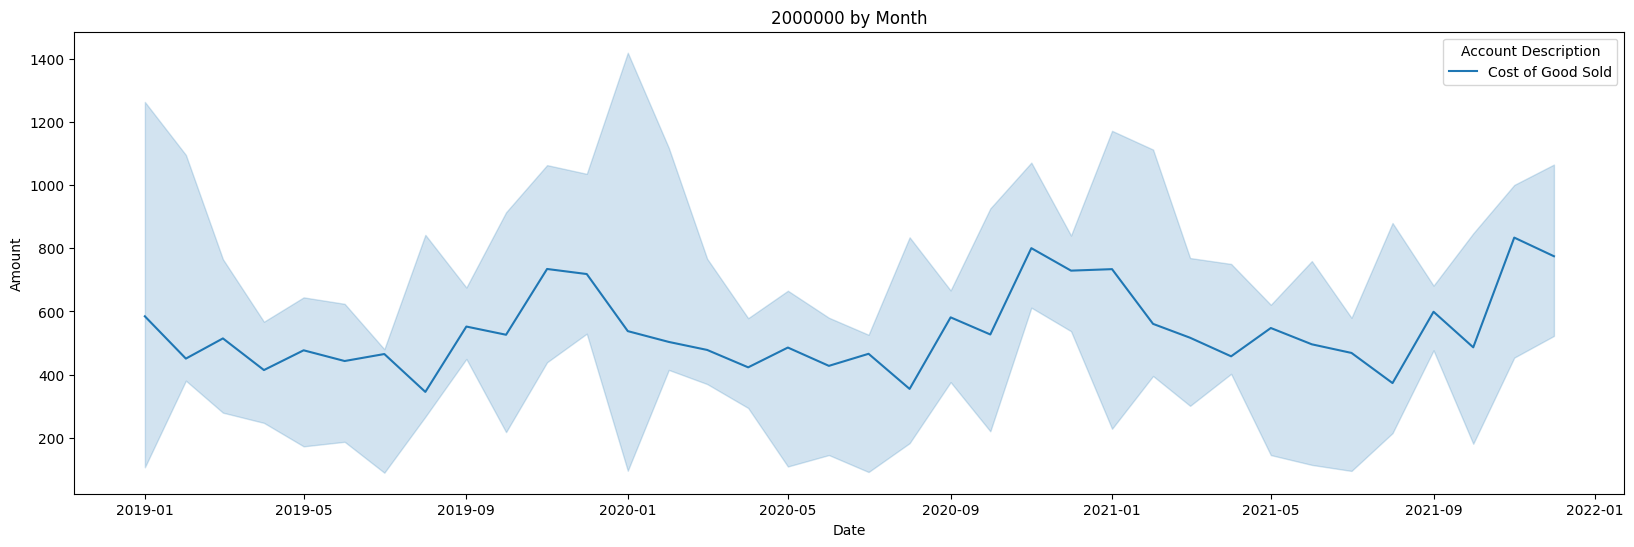

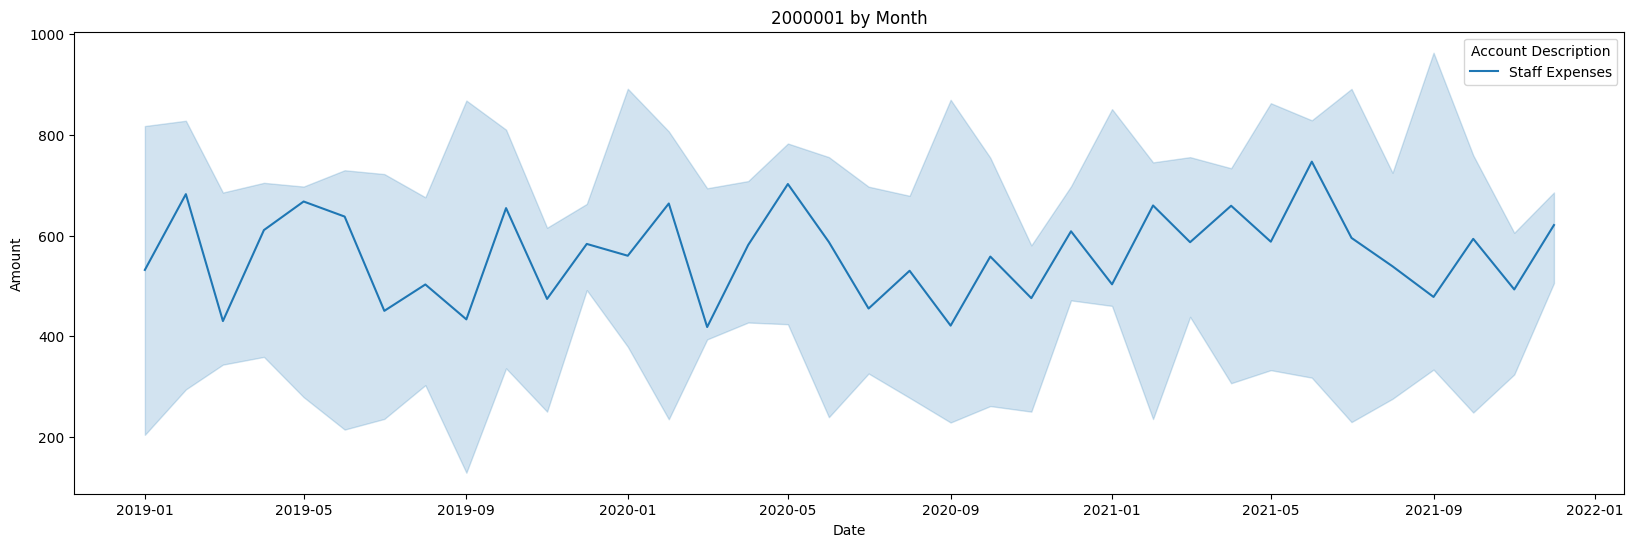

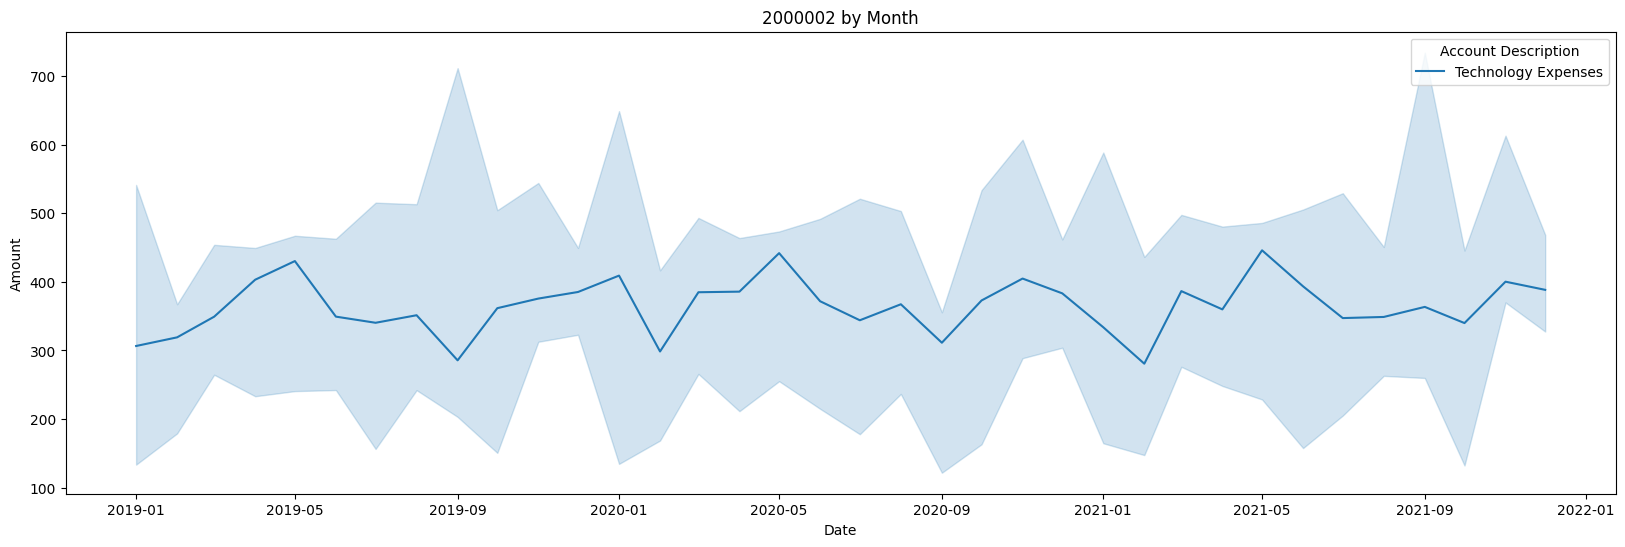

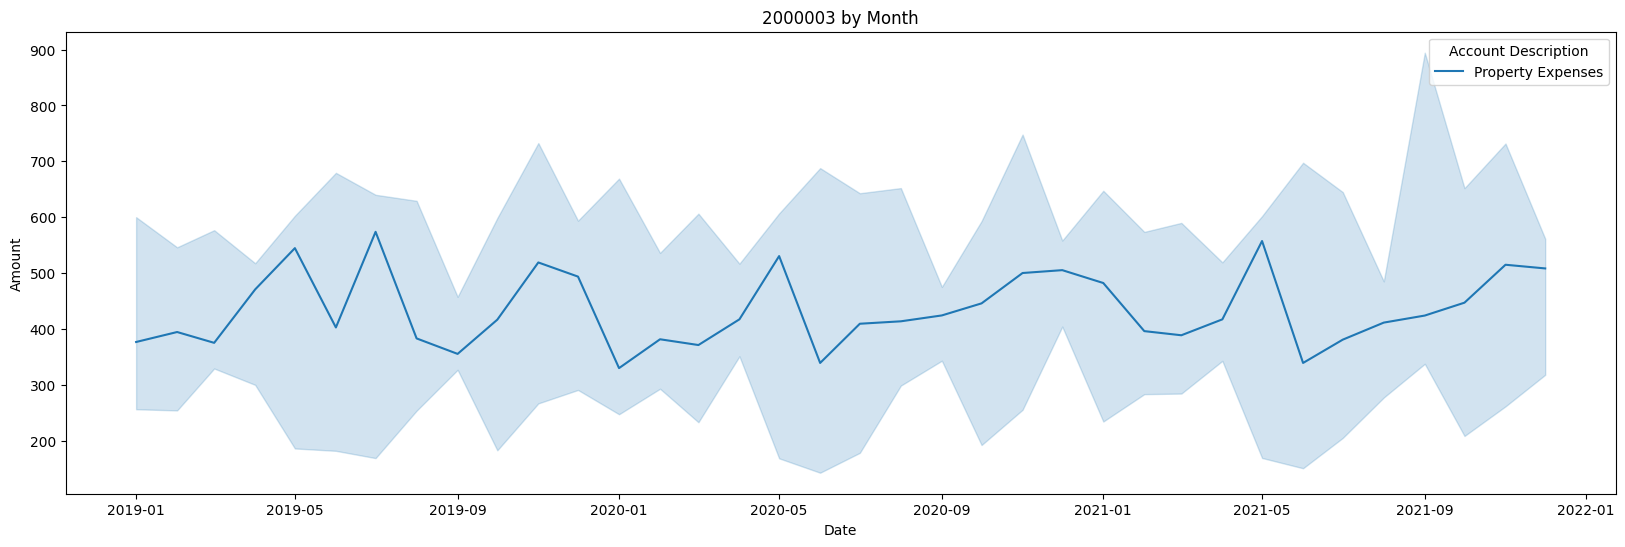

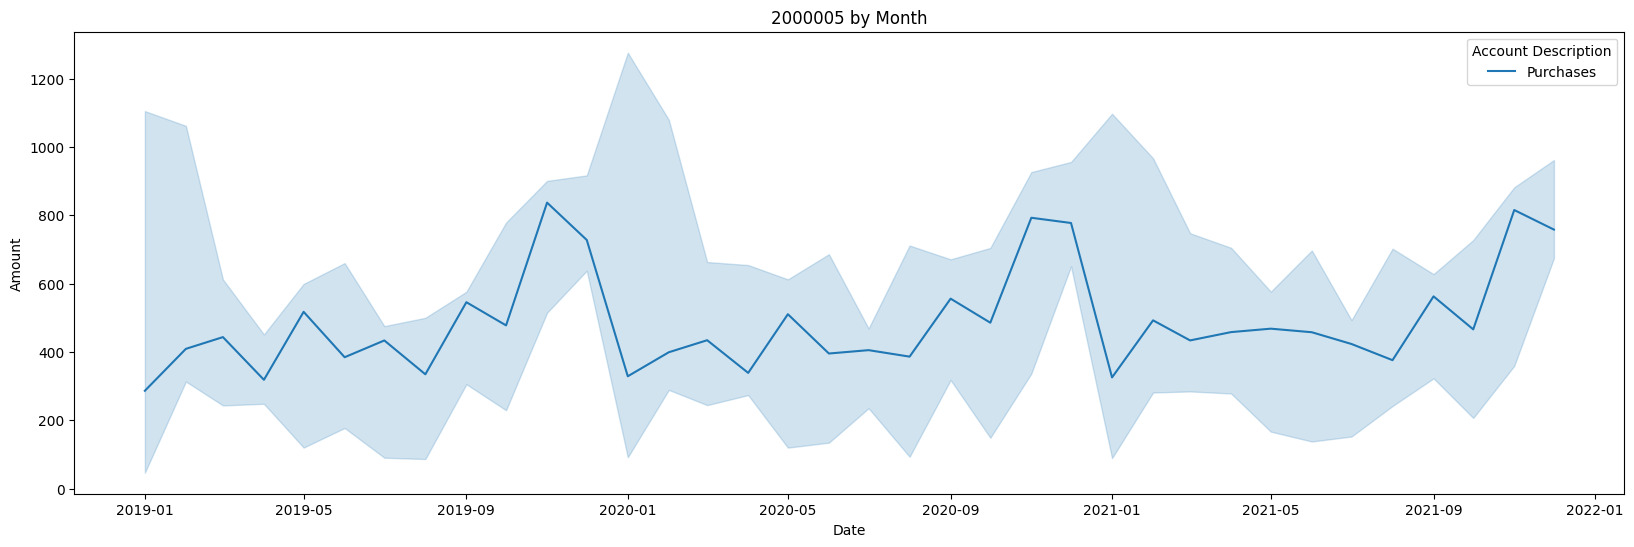

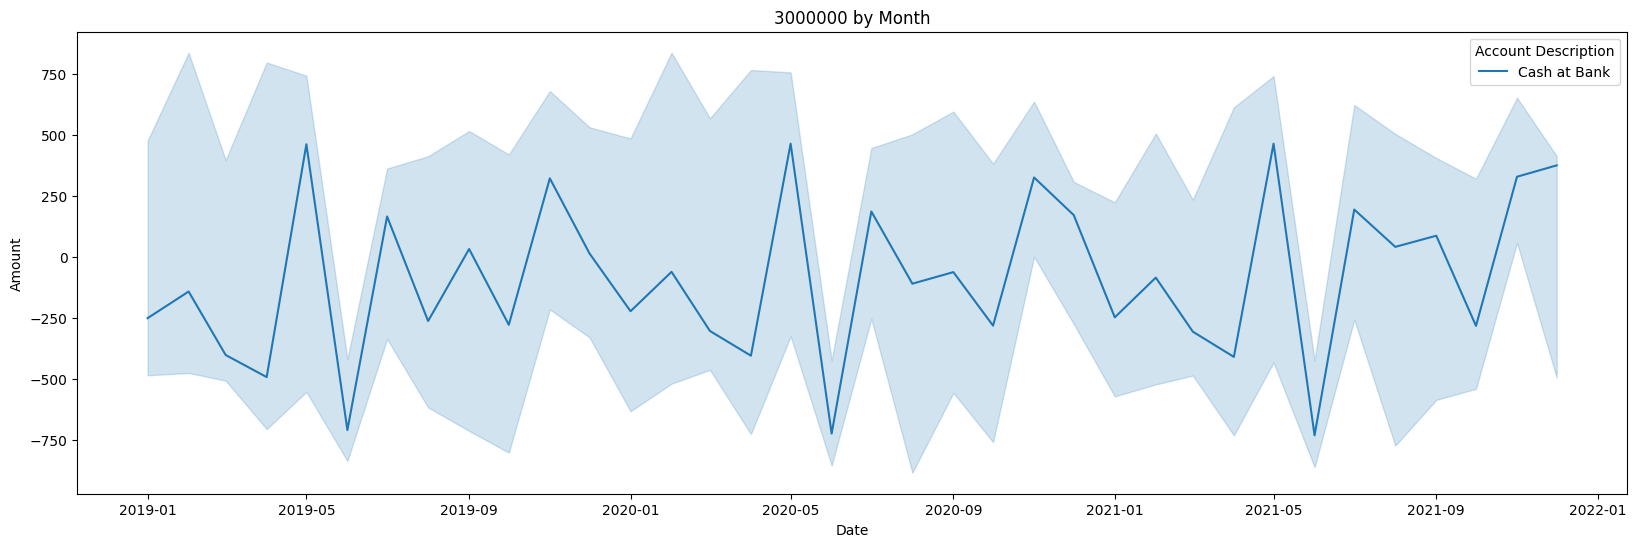

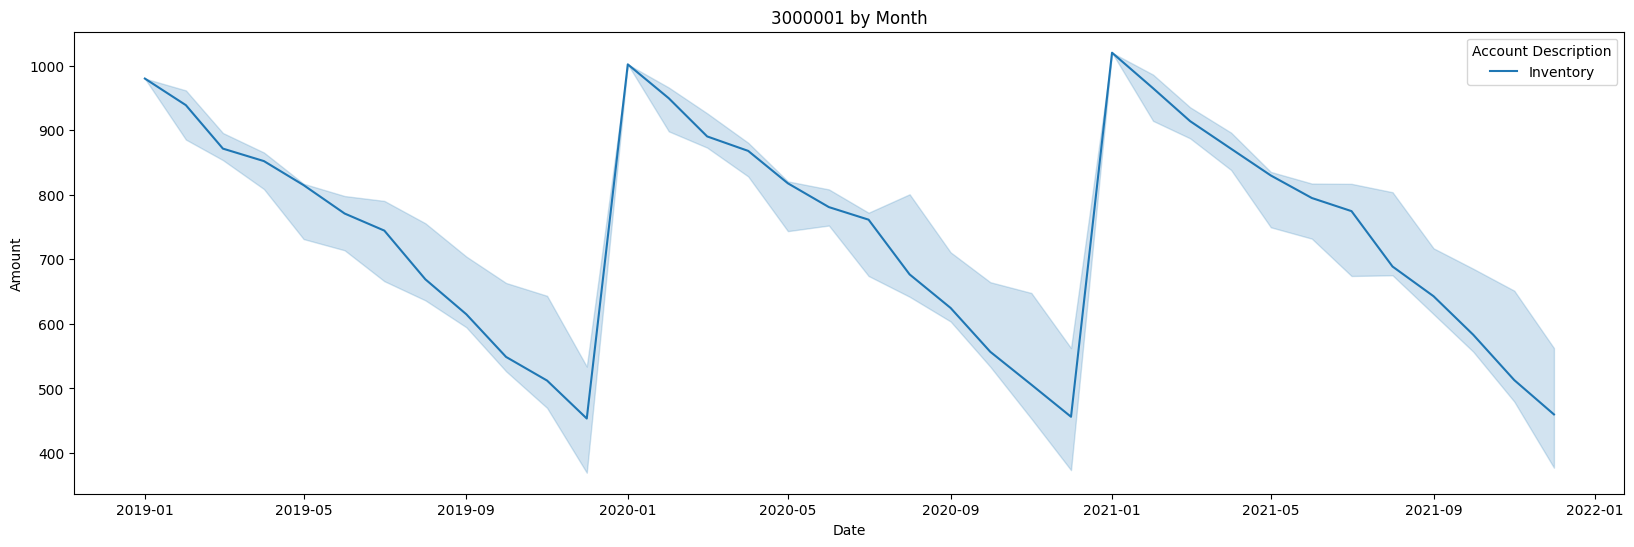

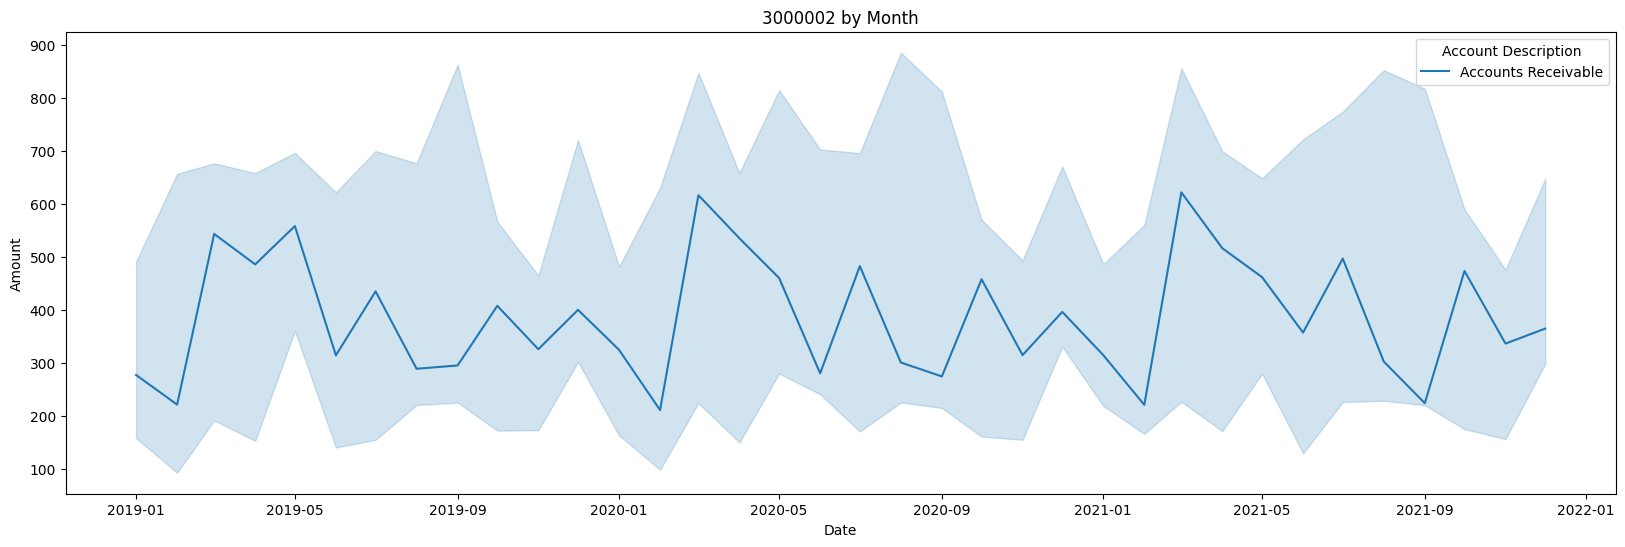

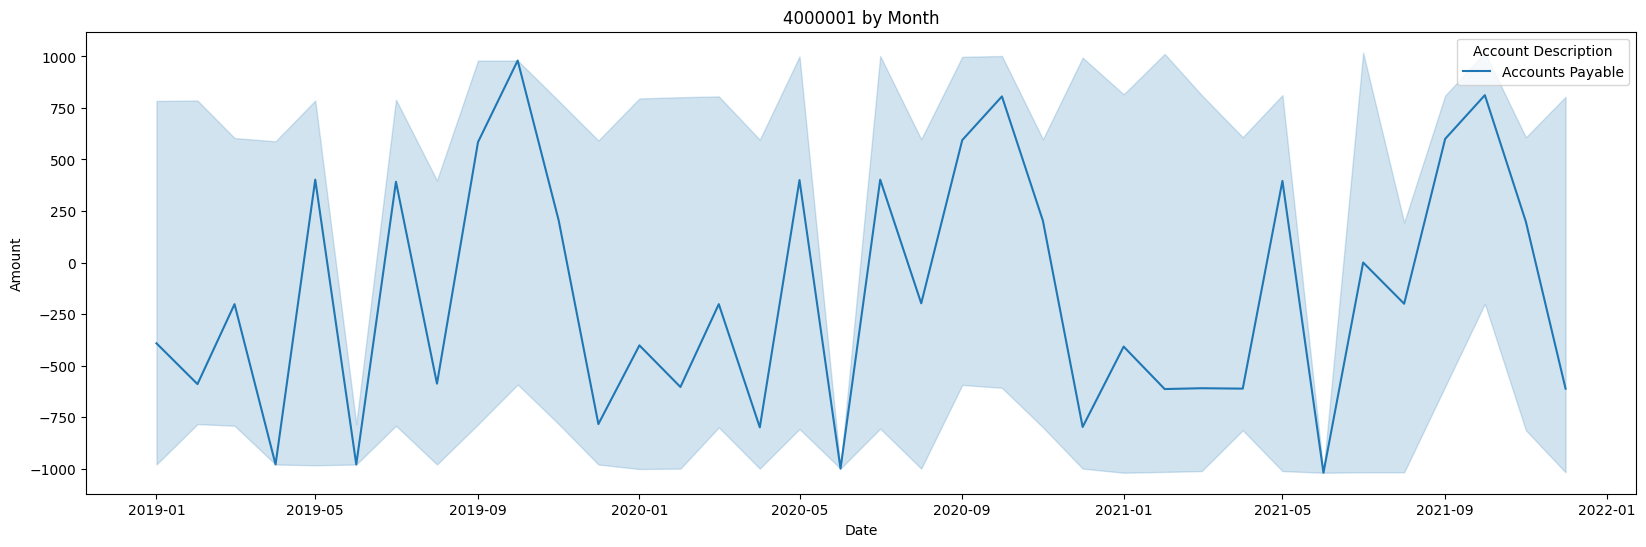

In [102]:
#Checking for outlier trends
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

Account 3000001 (Inventory) has a trend very different to other accounts and seems to follow a different seasonality/pattern compared to other accounts

In [103]:
df = df[df['Account']!=3000001]

df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001], dtype=int64)

### Converting Fields into Correct Data Types

In [104]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [105]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [106]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [107]:
df['Year'] = df['Year'].astype(str)

In [108]:
df.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

### Drop Fields

In [109]:
#Drop fields used for analysis as they won't be need for creating the ML model
df.drop(['Period', 'Day', 'Date'], axis=1, inplace=True)

In [110]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328


In [111]:
df.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [112]:
#Check if Account and Account Description hold the same number of values before dropping one
len(df['Account'].unique())

12

In [113]:
len(df['Account Description'].unique())

12

In [114]:
#Validating through joining the fields
df['AccountVal'] = df['Account'] + df['Account Description'] 

df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,AccountVal
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000Product Sales
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002Service Revenue
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004Fee Revenue
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000Cost of Good Sold


In [115]:
len(df['AccountVal'].unique())

12

In [116]:
 df.drop(['Account Description', 'AccountVal'], axis=1, inplace=True)

In [117]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


### Converting Categorical Features

In [118]:
df = pd.get_dummies(df, dtype=int)

df

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000002,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4206,540.060,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4207,698.121,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4208,-282.056,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4210,1152.680,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [119]:
df.dtypes

Amount                    float64
Year_2019                   int32
Year_2020                   int32
Year_2021                   int32
Month_Apr                   int32
Month_Aug                   int32
Month_Dec                   int32
Month_Feb                   int32
Month_Jan                   int32
Month_Jul                   int32
Month_Jun                   int32
Month_Mar                   int32
Month_May                   int32
Month_Nov                   int32
Month_Oct                   int32
Month_Sep                   int32
Cost Centre_CC100           int32
Cost Centre_CC101           int32
Cost Centre_CC102           int32
Cost Centre_CC200           int32
Cost Centre_CC201           int32
Cost Centre_CC202           int32
Cost Centre_CC300           int32
Cost Centre_CC301           int32
Cost Centre_CC302           int32
Account_ACC1000000          int32
Account_ACC1000001          int32
Account_ACC1000002          int32
Account_ACC1000004          int32
Account_ACC200

## Modelling

### Spliting Data

In [120]:
x = df.drop('Amount', axis=1)
y = df['Amount']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2721, 40) (1167, 40) (2721,) (1167,)


### Creating Machine Learning Model

In [123]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [124]:
#Sklearn ML pipeline
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=42)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=42)),
    'ridge':make_pipeline(Ridge(random_state=42)),
    'lasso':make_pipeline(Lasso(random_state=42)),
    'enet':make_pipeline(ElasticNet(random_state=42)),
}

In [125]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [126]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [127]:
#Dictionary to store hyperparameters
hyparamgrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}
#alpha is the learning rate for each of the algorithms

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [129]:
#Dictionary to store fitted models 
fit_models = {}

#For loops through piplines and uses GridSearchCV for hyperparameter tunning
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyparamgrid[algo], cv=10, n_jobs=-1)
    #Logging results while training models
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(x_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [131]:
#Making some predictions
fit_models['rf'].predict(x_test)

array([1242.47708, 1074.97644,  521.34428, ...,  642.06768,  372.72597,
         36.33798])

## Evaluation

In [132]:
from sklearn.metrics import r2_score, mean_absolute_error

In [133]:
#Loop through and evaluate models performance
for algo,model in fit_models.items():
    yhat = model.predict(x_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.8169835979631654 MAE:143.6278907883462
gb scores - R2:0.5232931204929845 MAE:262.0667914878961
ridge scores - R2:0.4135466589916059 MAE:296.9670559079201
lasso scores - R2:0.4121950732661862 MAE:297.2071942887699
enet scores - R2:0.41061253842473 MAE:297.49754683745607


Adjusting or implementing more hyperparameters can help improve the performance of different models, however for now the random forest regressor appears to perform the best, most likely because of what was previously said.